<h1>Lecture 3, September 15, 2025 </h1>

<h1> Estimation of ARIMA models </h1>

Marta Boczon

Department of Economics

Copnehagen Business School

mbo.eco@cbs.dk

In [1]:
install.packages("quantmod")
install.packages("fredr")
install.packages("ggfortify")
install.packages('urca')
install.packages("tseries")
install.packages("forecast")
install.packages("dynlm")
install.packages("stargazer")
install.packages("dLagM")

also installing the dependencies 'xts', 'TTR'





The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages


also installing the dependency 'httr'





The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages

The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages

The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages


also installing the dependency 'quadprog'





The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages


also installing the dependencies 'fracdiff', 'timeDate'





The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages

The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages

The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages


also installing the dependencies 'Formula', 'gtools', 'operator.tools', 'nardl', 'AER', 'formula.tools', 'strucchange', 'wavethresh', 'roll', 'sandwich'





The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//Rtmpqz1HKa/downloaded_packages


### Exercise:

Test each of the five series below example a throuhg b for a unit root using the ADF test.

In [ ]:
###################################################################################
# Example A
T = 200                     # Set the number of time periods (length of the series)
ex.a = rep(0, T)            # Create an empty vector of length T to store the simulated series
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)
beta0 = 40                  # Set the intercept (starting level of the series)
beta1 = 0.4                 # Set the slope (deterministic trend)
t = 1:T                     # Create a time index from 1 to T

# Loop over each time period and compute the value of y_t
for (i in 1:T) {
  ex.a[i] = beta0 + beta1 * t[i] + e[i]
}
###################################################################################
# Example B
T = 200                     # Set the number of time periods (length of the series)
ex.b = rep(0, T)            # Create an empty vector of length T to store the simulated series
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)
beta0 = 0.8                 # Constant term (drift component)
beta1 = 0.4                 # Autoregressive coefficient (effect of past y on current y)
beta2 = 0.1                 # Coefficient on time trend (deterministic component)
t = 1:T                     # Create a time index from 1 to T

# Loop from the 2nd observation onwards
# Each value depends on: 
#  - a constant (beta0)
#  - the lagged value (beta1 * ex.b[i-1]) → autoregressive component
#  - a deterministic time trend (beta2 * t[i])
#  - a random shock (e[i])
for (i in 2:T) {
  ex.b[i] = beta0 + beta1 * ex.b[i-1] + beta2 * t[i] + e[i]
}
###################################################################################
# Example C
T = 200                     # Set the number of time periods (length of the series)
ex.c = rep(0, T)            # Create an empty vector of length T to store the simulated series
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)

# Loop from the 2nd observation onwards
# Each value is yesterday’s value plus a random shock (random walk)
for (t in 2:T) {
  ex.c[t] = ex.c[t-1] + e[t]
}
###################################################################################
# Example D
T = 200                     # Set the number of time periods (length of the series)
ex.d = rep(0, T)            # Create an empty vector of length T to store the simulated series
beta0 = 0.5                 # Constant term (drift) that shifts the process upward over time
set.seed(123)               # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)        # Generate T random errors from N(0, 0.2^2)

# Loop from the 2nd observation onwards
# Each value equals yesterday’s value + a constant drift + a random shock
for (t in 2:T) {
  ex.d[t] = beta0 + ex.d[t-1] + e[t]
}
###################################################################################
# Example E
T = 200                        # Set the number of time periods (length of the series)
ex.e = rep(0, T)               # Create an empty vector of length T to store the simulated series
beta0 = 0.5                    # Constant drift term (shifts the process upward each step)
beta1 = 0.9                    # Coefficient on deterministic trend (linear trend over time)
set.seed(123)                  # Fix the random seed for reproducibility
e = rnorm(T, 0, 0.2)           # Generate T random errors from N(0, 0.2^2)
t = 1:T                        # Define time index from 1 to T

# Loop from the 2nd observation onwards
# Each value = yesterday’s value + constant drift + time trend + random shock
for (t in 2:T) {
  ex.e[t] = beta0 + beta1 * t + ex.e[t-1] + e[t]
}

In [5]:
library(urca)
summary(ur.df(ex.a, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45413 -0.12172 -0.01179  0.12125  0.59979 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.73937    6.16594   7.580 1.61e-12 ***
z.lag.1     -1.16065    0.15648  -7.417 4.18e-12 ***
tt           0.46412    0.06259   7.416 4.22e-12 ***
z.diff.lag1  0.10125    0.13637   0.742   0.4587    
z.diff.lag2  0.02452    0.10662   0.230   0.8184    
z.diff.lag3  0.12064    0.07268   1.660   0.0986 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1875 on 185 degrees of freedom
Multiple R-squared:  0.5508,	Adjusted R-squared:  0.5387 
F-statistic: 45.37 on 5 and 185 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.4174

stationary since we reject the null hypothesis that gamma is 0, meaning that there is a unit root (stationary).

In [ ]:
summary(ur.df(ex.b, type='trend', lags=8, selectlags="AIC")) 
# constant + deterministic trend + AR(1)
# alpha + beta*t + gamma*y_(t-1) + sum(delta * Delta * y) + e_t


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45530 -0.11462 -0.01743  0.12388  0.60814 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.020e+00  1.142e-01   8.931 4.19e-16 ***
z.lag.1     -7.112e-01  1.098e-01  -6.475 8.28e-10 ***
tt           1.184e-01  1.830e-02   6.470 8.55e-10 ***
z.diff.lag1  4.501e-02  1.028e-01   0.438   0.6621    
z.diff.lag2  3.248e-05  8.736e-02   0.000   0.9997    
z.diff.lag3  1.254e-01  7.282e-02   1.722   0.0868 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1881 on 185 degrees of freedom
Multiple R-squared:  0.3553,	Adjusted R-squared:  0.3379 
F-statistic: 20.39 on 5 and 185 DF,  p-value: 3.458e-16


Value of test-statist

stationary since we reject the null hypothesis that gamma is 0, meaning that there is not a unit root (stationary).

Tests
- tau3: tests whether the series has a unit root (H₀: γ = 0 → unit root).
    - If you reject → the series is stationary (possibly around a deterministic trend).
- phi2: tests whether the deterministic trend term = 0.
    - If you reject → there is a significant trend component.
- phi3: joint test: H₀: γ = 0 (unit root) AND trend coefficient = 0.
    - If you reject → you reject the possibility of a unit root without trend.

Decision rules:
- If it’s a tau test → compare “<” (more negative = stronger evidence).
- If it’s a phi test → compare “>” (larger = stronger evidence).

Results:
- tau3: -6.4754 < -3.99, 99% certainty that the series is stationary (with trend allowed).
- phi2: 53.1713 >> 6.22, 99% certainty that we reject the null that the deterministic trend is zero (there is a trend).
- phi3: 21 >> 8.43, 99% certainty that we reject that the deterministic trend = 0

In [8]:
summary(ur.df(ex.c, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43810 -0.10702 -0.01389  0.11725  0.59344 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0565919  0.0349227   1.620   0.1068  
z.lag.1     -0.0600566  0.0259327  -2.316   0.0217 *
tt          -0.0003077  0.0002560  -1.202   0.2309  
z.diff.lag  -0.0451358  0.0732050  -0.617   0.5383  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1868 on 187 degrees of freedom
Multiple R-squared:  0.03477,	Adjusted R-squared:  0.01929 
F-statistic: 2.246 on 3 and 187 DF,  p-value: 0.08445


Value of test-statistic is: -2.3159 1.9111 2.838 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  

we fail to reject the null hypothesis that gamma is 0, meaning that we don't have evidence against the presence of a unit root (non-stationary).

# Notes

---

### Case: `type = "trend"`
*Stationary since we reject the null hypothesis that γ = 0, meaning that there is not a unit root (stationary around a deterministic trend).*


CHECK TESTS SINCE IT CONFLICTS WITH WHAT THE TEACHER SAYS

**Tests**
- **tau3**: tests whether the series has a unit root (*H₀: γ = 0 → unit root*).  
  - If you reject → the series is stationary (possibly around a deterministic trend).  
- **phi2**: tests whether the deterministic trend term = 0.  
  - If you reject → there is a significant trend component.  
- **phi3**: joint test: *H₀: γ = 0 (unit root) AND trend coefficient = 0*.  
  - If you reject → you reject the possibility of a unit root without trend.  

**Decision rules**
- If it’s a tau test → compare “<” (more negative = stronger evidence).  
- If it’s a phi test → compare “>” (larger = stronger evidence).  

**Example Results**
- tau3 = –6.475 < –3.99 → reject at 1% → strong evidence that the series is stationary.  
- phi2 = 53.17 >> 6.22 → reject at 1% → deterministic trend is significant.  
- phi3 = 21.0 >> 8.43 → reject at 1% → trend specification is valid.  

---

### Case: `type = "drift"`
*Stationary since we reject the null hypothesis that γ = 0, meaning that there is not a unit root (stationary around a drift).*

**Tests**
- **tau2**: tests whether the series has a unit root (*H₀: γ = 0 → unit root*).  
  - If you reject → the series is stationary (possibly with a drift term).  
- **phi1**: joint test: *H₀: γ = 0 (unit root) AND drift = 0*.  
  - If you reject → you reject the possibility of a unit root without drift.  

**Decision rules**
- If it’s a tau test → compare “<” (more negative = stronger evidence).  
- If it’s a phi test → compare “>” (larger = stronger evidence).  

**Example Results**
- tau2 = –4.2 < –3.46 → reject at 1% → stationary (with drift allowed).  
- phi1 = 7.0 > 6.52 → reject at 1% → drift is significant.  

---

### Case: `type = "none"`
*Stationary since we reject the null hypothesis that γ = 0, meaning that there is not a unit root (stationary without drift or trend).*

**Tests**
- **tau1**: tests whether the series has a unit root (*H₀: γ = 0 → unit root*).  
  - If you reject → the series is stationary (no deterministic terms included).  

**Decision rules**
- If it’s a tau test → compare “<” (more negative = stronger evidence).  

**Example Results**
- tau1 = –2.9 < –2.57 → reject at 10% (weak evidence of stationarity).  
- tau1 = –1.8 > –2.57 → fail to reject → cannot rule out unit root (series likely non-stationary).  

---


```text
Start with type="trend":
 └─ Reject tau3? No → likely non-stationary (unit root).
 └─ Yes → Stationary. Then check phi2/phi3:
       └─ Reject → Trend is significant → trend-stationary.
       └─ Fail → Drop trend → test type="drift":
             └─ Reject tau2? No → likely non-stationary.
             └─ Yes → Stationary. Then check phi1:
                   └─ Reject → drift is significant → stationary around mean ≠ 0.
                   └─ Fail → Drop drift → test type="none":
                         └─ Reject tau1 → stationary around zero mean.
                         └─ Fail → non-stationary.
```

### Why this order?
Because deterministic components (trend or drift) can mask or mimic stochastic trends.Starting from the richest model (trend) ensures you don’t mistakenly ignore structure. Then you “simplify” only if the data say the extra terms (trend/drift) are not statistically needed.



Check specification first with the φ-tests

The φ-tests tell you if the deterministic terms (trend, drift) are needed.
- If φ rejects → keep that term.
- If φ does not reject → you can drop it and move to a simpler model.

Then check stationarity with the τ-test: once you know the right specification (trend, drift, or none), you interpret the corresponding τ-statistic (tau1, tau2, tau3) to test for a unit root.

```text

τ → reject when the test statistic is more negative than the critical value.
φ → reject when the test statistic is greater than the critical value.
(ALWAYS to the left basically)

Trend case
- phi2: no deterministic trend
- phi3: no trend and unit root
- tau3: unit root present (non-stationary)

Drift case
- phi1: no drift (intercept = 0)
- tau2: unit root present (non-stationary)

None case
- no phi test here
- tau1: unit root present (non-stationary)


### ADF Testing Workflow (phi-first)

Start with type="trend":
 └─ Step 1: Check phi2 / phi3
       └─ If phi2 rejects → trend is significant → keep "trend".
       └─ If phi2 does not reject but phi3 rejects or otherwise conflict → the model with a trend is considered misspecified → drop trend and test with drift.
       └─ If both fail → drop trend → move to "drift".
 └─ Step 2: Within the chosen spec, check tau3 (unit root test).
       └─ Reject → stationary (trend-stationary). But detrend since trend is significant.
       └─ Fail → unit root remains (non-stationary). Differentiate and retest.

If "drift":
 └─ Step 1: Check phi1
       └─ If phi1 rejects → drift is significant → keep "drift".
       └─ If phi1 fails → drop drift → move to "none".
 └─ Step 2: Within the chosen spec, check tau2 (unit root test).
       └─ Reject → stationary (stationary around a non-zero mean).
       └─ Fail → unit root remains (non-stationary).

If "none":
 └─ Step 1: No phi-test here.
 └─ Step 2: Check tau1 (unit root test).
       └─ Reject → stationary around zero mean.
       └─ Fail → unit root remains (non-stationary).

```

# Box-Jenkins model selection

**Identification stage**:  
<ul>
    <li> Visually examine the time plot (detect outliers, missing values, structural breaks, non-stationarity)
    <li> Address non-stationarity
    <li> Examine Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF), and identify potential models    
</ul>  

**Estimation and diagnostic stage**:
<ul>
    <li> Estimate all potential models
    <li> Select the best model(s) using suitable criterion/criteria          
    <li> Check ACF and PACF of the residuals
</ul>

**Application stage**:  
<ul>
    <li> Use the model(s) to forecast   
</ul>

# Empirical example

Today’s lecture will focus on learning by doing with a real data example.
We will walk step by step through the process of analyzing a time series, starting from the very beginning and moving all the way to model comparison. Specifically, we will:

1. Import the dataset into our software.

2. Create a time series object.

3. Plot the data to get an initial look at patterns.

4. Test whether the series has a unit root.

5. Apply treatments for non-stationarity if necessary and re-test.

6. Plot the data, the autocorrelation function (ACF) and the partial autocorrelation function (PACF).

7. Estimate various ARMA models.

8. Compare the competing models using information criteria.

9. Export results.

# Step 1: Import the data


For today’s example, we’ll be working with data from the **Federal Reserve Bank of St. Louis**, often referred to as **FRED** (Federal Reserve Economic Data).

**What is FRED?**
FRED is one of the most widely used databases in economics and finance. It’s maintained by the St. Louis Fed and provides free access to thousands of economic time series from around the world.

**Why do we use it?**

a) It’s reliable and regularly updated.

b) It covers a huge variety of economic indicators (GDP, inflation, unemployment, exchange rates, stock market data, etc.).

c) It’s easy to access in many formats (**Excel**, **CSV**, **R**, **Stata**, etc.).

**For us today:**

We’ll use FRED as our data source to illustrate the steps of time series analysis. The nice thing about using FRED data is that the same tools and workflow you’ll practice today can be applied to almost any economic variable you’re interested in.

1. **Data**: Canadian GDP (Real Gross Domestic Product for Canada)

2. **Source**: International Monetary Fund via FRED®

3. **Frequency**: Quarterly

4. **Units**: Millions of Domestic Currency

5. **Seasonal adjustment**: Seasonally Adjusted

https://fred.stlouisfed.org/series/NGDPRSAXDCCAQ

In [3]:
# Import the dataset from a CSV file downloaded from FRED
data =read.csv("NGDPRSAXDCCAQ.csv")

# Display the first six rows of the dataset
# This helps us check the structure of the data and the column names
head(data)

# Display the last six rows of the dataset
# This lets us confirm how recent the observations are and the overall time span
tail(data)

,observation_date,NGDPRSAXDCCAQ
,<chr>,<dbl>
1,1961-01-01,90980.8
2,1961-04-01,93284.5
3,1961-07-01,95554.5
4,1961-10-01,96854.5
5,1962-01-01,99431.8
6,1962-04-01,100222.0


,observation_date,NGDPRSAXDCCAQ
,<chr>,<dbl>
252,2023-10-01,599156.5
253,2024-01-01,600215.5
254,2024-04-01,604005.5
255,2024-07-01,607606.3
256,2024-10-01,610704.3
257,2025-01-01,614059.8


**Conclusion**: We see that our data runs from 1961Q1 to 2025Q1.

# Step 2: Create a time series object

In [ ]:
# Convert the second column of the dataset (the actual GDP values) into a time series object
# 'frequency = 4' specifies that the data are quarterly
# 'start = c(1961, 1)' indicates that the series begins in the first quarter of 1961
tsdata = ts(
    data[, 2], 
    frequency = 4, 
    start = c(1961, 1) # starts in 1961 Q1
)

# A time series object in R (created with the ts() function) is a special data structure designed to store and work
# with data observed at regular time intervals, such as monthly inflation, quarterly GDP, or daily stock prices.
# Regular intervals: A time series object knows the frequency of the data:
# (e.g., 4 for quarterly, 12 for monthly, 365 for daily).
# Start: It records when the series begins (e.g., 1961 Q1) and when it ends.
# Built-in functionality: Many R functions (like plotting, computing ACF/PACF, or estimating ARMA models) 
# are designed to work directly with ts objects. That’s why it’s important to convert raw data into this format.

# Print the time series object to verify it was created correctly
tsdata

,Qtr1,Qtr2,Qtr3,Qtr4
1961,90980.8,93284.5,95554.5,96854.5
1962,99431.8,100222.0,101503.8,103495.5
1963,104151.8,105666.5,106469.5,109801.5
1964,112550.3,112971.8,114177.5,114750.3
1965,118400.5,119484.5,121152.0,124121.3
1966,126536.5,129268.0,129206.3,130807.5
1967,130512.8,133231.8,133651.8,134234.0
1968,135378.3,139017.8,140954.0,142905.8
1969,144862.3,145458.3,147072.0,149150.3
1970,150072.0,150084.5,151637.8,151868.0


In [10]:
# Calculate the number of observations in the time series object
nd = length(tsdata)

# Print a message along with the number of observations
cat("There are", nd, "observations in our data set.")

There are 257 observations in our data set.

# Step 3: Plot the data 

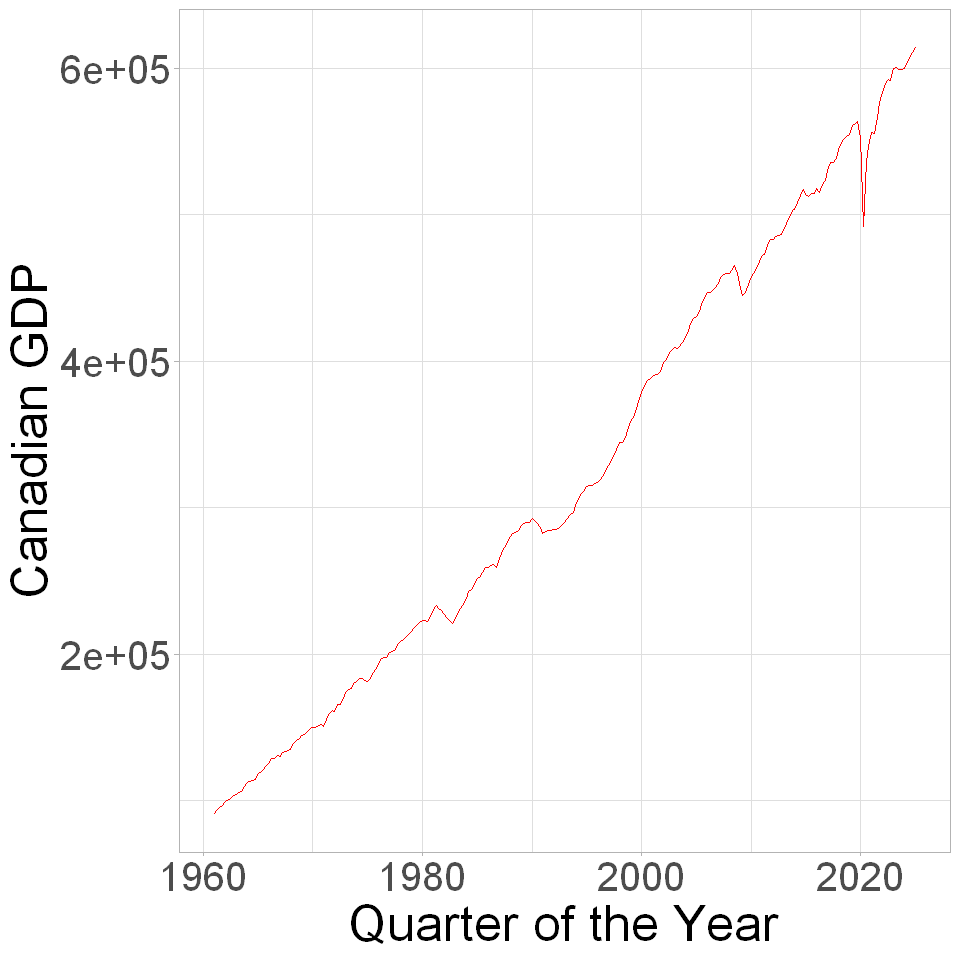

In [13]:
# Load the ggplot2 package for plotting
library(ggplot2)

# Load ggfortify, which allows autoplot() to work directly with time series objects
library(ggfortify)

# Set default figure size for plots
options(repr.plot.width = 8, repr.plot.height = 8)

# Create a plot of the time series object 'tsdata' in red
fig = autoplot(tsdata, colour = 'red')

# Customize the plot appearance
fig = fig + 
  theme(aspect.ratio = 1) +   # Keep a square aspect ratio
  theme_light() +             # Use a light background theme
  theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) + # Adjust margins
  theme(text = element_text(size = 30)) + # Increase font size for readability
  labs(x = "Quarter of the Year") +          # Label the x-axis
  labs(y = "Canadian GDP")    # Label the y-axis

# Display the plot
fig


# Step 4: Test for a unit root

In [15]:
# Load the urca package, which provides functions for unit root and cointegration tests
library(urca)

# Perform an Augmented Dickey-Fuller (ADF) test for a unit root
# - tsdata: the time series we are testing
# - type = "trend": includes both a constant and a deterministic trend in the test regression
# - lags = 8: sets the maximum number of lags to include
# - selectlags = "AIC": automatically selects the optimal number of lags based on the Akaike Information Criterion
summary(ur.df(tsdata, type = 'trend', lags = 8, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-64305  -1193    364   1811  33356 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 4713.60919 1542.64517   3.056   0.0025 **
z.lag.1       -0.04977    0.02158  -2.307   0.0219 * 
tt           106.55674   44.10408   2.416   0.0164 * 
z.diff.lag    -0.09458    0.06383  -1.482   0.1397   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5436 on 244 degrees of freedom
Multiple R-squared:  0.03929,	Adjusted R-squared:  0.02748 
F-statistic: 3.326 on 3 and 244 DF,  p-value: 0.02035


Value of test-statistic is: -2.3066 15.1122 3.294 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.98 -3.42 -3.13
phi2  6.15  4.71  4.05

**First test (type = "trend")**

At the 1% significance level:

- **phi2 test statistic = 15.1122**  
  Critical value (1%) = 6.15  
  → Reject the null that the constant and deterministic trend are jointly zero.  

- **phi3 test statistic = 3.294**  
  Critical value (1%) = 8.34  
  → Do not reject the null that the deterministic trend is zero.  

Because the phi tests give conflicting results, the regression including a deterministic trend is **misspecified**.  
We should therefore re-run the test with `type = "drift"` (constant only).  

In [16]:
library(urca)
summary(ur.df(tsdata, type='drift', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-64883  -1252    201   1820  34769 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.619e+03  8.683e+02   1.865   0.0634 .
z.lag.1      2.048e-03  2.387e-03   0.858   0.3917  
z.diff.lag  -1.200e-01  6.358e-02  -1.888   0.0603 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5489 on 245 degrees of freedom
Multiple R-squared:  0.0163,	Adjusted R-squared:  0.008275 
F-statistic:  2.03 on 2 and 245 DF,  p-value: 0.1335


Value of test-statistic is: 0.858 19.3673 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


**Second test (type = "drift")**

At the 1% significance level:

- **phi1 test statistic = 19.3673**  
  Critical value (1%) = 6.47  
  → Reject the null that the constant is zero.  
  → The drift specification is appropriate.  

- **tau2 test statistic = 0.858**  
  Critical value (1%) = -3.44  
  → Do not reject the null of a unit root.  

**Conclusion:** The drift specification is correct, but the ADF test indicates that the series has a **unit root (non-stationary)**.  
This means we will need to **difference the series** before proceeding with modeling.

# Step 5: Treat for non-stationarity if necessary and re-test

- The **ADF test** only checks for **non-stationarity in the mean** (i.e., a unit root).  

- In an **additive random walk** or a **random walk with drift**, first differencing removes the unit root.  
  - This cures both:
    - the time dependence of the mean, and  
    - the time dependence of the variance (since shocks are additive with constant variance).  See Proofs in Lecture 2.

- But in most **real-world data** (e.g., GDP, stock prices, exchange rates), shocks are **multiplicative**: larger levels come with larger fluctuations.  
  - In this case, differencing alone will fix the mean (unit root), but **not the variance**.  

- To address this, we first apply a **natural log transformation**, which turns multiplicative shocks into additive ones.  
  - Then, taking **first differences of the logged data** removes the unit root *and* yields a series with approximately constant mean and variance.  

In [20]:
# Transform the series into (approximate) percentage changes
# - log(tsdata): takes the natural log to convert multiplicative shocks into additive shocks 
#                (stabilizes variance across time)
# - diff(...): takes first differences to remove the unit root (non-stationarity in the mean)
# Together: dy is the log-differenced series, which represents GDP growth rates 
#           with approximately constant mean and variance
dy = diff(log(tsdata))

**Deteaur on logarithmic transformation**

The growth rate $g$ is defined as

$$\color{blue}{g = \frac{y_{t}-y_{t-1}}{y_{t-1}}}$$

Now, let us see if we can approximate $g$ by taking the first difference of a natural logarithm of $y_t$.

$\color{blue}{Δ\log y_t = \log (y_t) - \log (y_{t-1})=\log(\frac{y_t}{y_{t-1}})=\log(\frac{y_t-y_{t-1}+y_{t-1}}{y_{t-1}})=\log(\frac{y_t-y_{t-1}}{y_{t-1}}+1)\approx \frac{y_t-y_{t-1}}{y_{t-1}}}$

This above holds true because for any small $x$
$$\color{blue}{\log(1+x)\approx x}$$

**Re-testing**
- We start from **drift**, because that’s where we left off in the levels.  
- Including a deterministic trend now would be inconsistent — it was already rejected at the first stage.  
- Interpretation:
  - If the ADF with drift rejects → the differenced series (Δyₜ) is **stationary**.  
  - If not → the differenced series still has a unit root → difference again (testing for I(2)), still under **drift** as the maintained specification.  

In [26]:
# Load the urca package, which provides functions for unit root and cointegration tests
library(urca)

# Perform an Augmented Dickey-Fuller (ADF) test on the differenced log series (dy)
# - dy: the log-differenced data, i.e. approximate growth rates
# - type = "trend": includes a constant and a deterministic trend in the test regression
# - lags = 8: sets the maximum number of lags to consider
# - selectlags = "AIC": automatically selects the optimal lag length using the Akaike Information Criterion
# The summary output reports the tau and phi statistics for unit root testing
summary(ur.df(dy, type = "drift", lags = 8, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.123222 -0.004833 -0.000034  0.004944  0.081984 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.006871   0.001029   6.680  1.6e-10 ***
z.lag.1     -0.964626   0.089884 -10.732  < 2e-16 ***
z.diff.lag  -0.022828   0.063963  -0.357    0.721    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01261 on 244 degrees of freedom
Multiple R-squared:  0.4942,	Adjusted R-squared:   0.49 
F-statistic: 119.2 on 2 and 244 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.7319 57.5879 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


#### Results
- **Phi1 = 57.59**  
  - 1% critical value = 6.47  
  - The large value confirms that including a **constant (drift)** is appropriate.  
- **Tau2 test statistic = -10.73**  
  - 1% critical value = -3.44  
  - Since -10.73 < -3.44, we **reject the null hypothesis of a unit root**.  

#### Conclusion
- After first differencing, the series **no longer has a unit root**.  
- The differenced log series (GDP growth) is **stationary around a constant mean**.  
- This means the series is now suitable for **ARMA-type modeling**.

# Step 6: Plot the data, the ACF and PACF

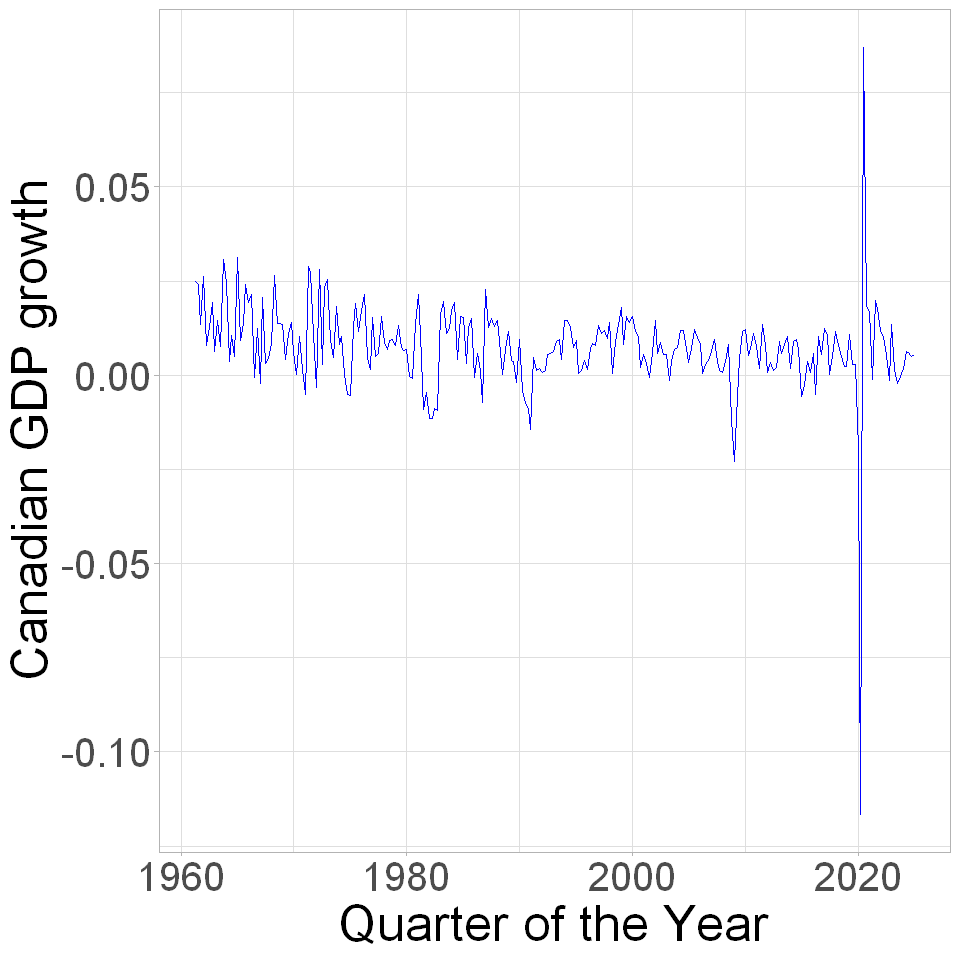

In [51]:
# Load the ggplot2 package for plotting
library(ggplot2)

# Load ggfortify, which allows autoplot() to work directly with time series objects
library(ggfortify)

# Set default figure size for plots
options(repr.plot.width = 8, repr.plot.height = 8)

# Create a plot of the time series object 'tsdata' in red
fig = autoplot(dy, colour = 'blue')

# Customize the plot appearance
fig = fig + 
  theme(aspect.ratio = 1) +   # Keep a square aspect ratio
  theme_light() +             # Use a light background theme
  theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) + # Adjust margins
  theme(text = element_text(size = 30)) + # Increase font size for readability
  labs(x = "Quarter of the Year") +          # Label the x-axis
  labs(y = "Canadian GDP growth")    # Label the y-axis

# Display the plot
fig

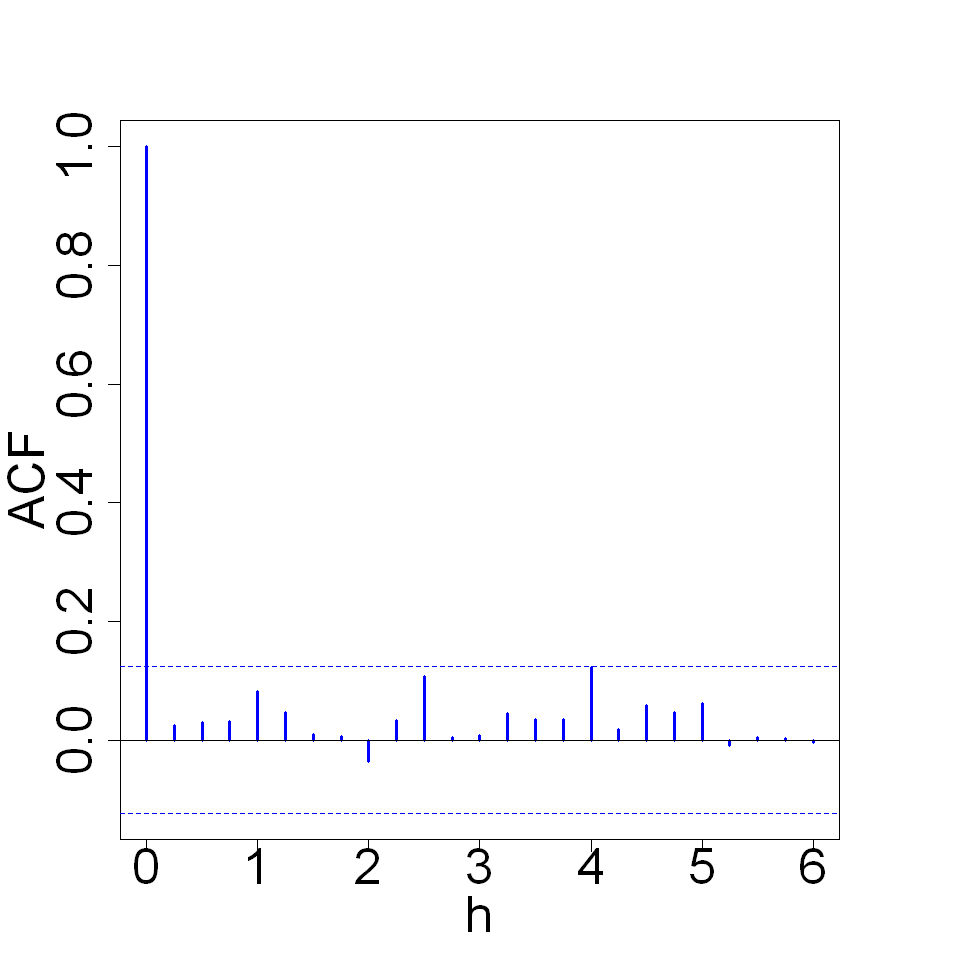

In [12]:
# Compute the autocorrelation function (ACF) of dy without plotting
acfun = acf(dy, plot = FALSE)

# Set the size of the plotting window (useful in Jupyter / R notebooks)
options(repr.plot.width = 8, repr.plot.height = 8)

# Adjust margins: bottom, left, top, right
par(mar = c(5, 5, 5, 5))

# Plot the ACF with custom styling
plot(acfun, 
     col = "blue",        # bars in blue
     main = "",           # remove the default main title
     cex = 2.5,           # scale size of points (not critical here)
     cex.lab = 2.5,       # enlarge axis labels (xlab, ylab)
     cex.axis = 2.5,      # enlarge tick labels
     xlab = "h",          # label for x-axis (lag h)
     lwd = 3)             # line width for bars


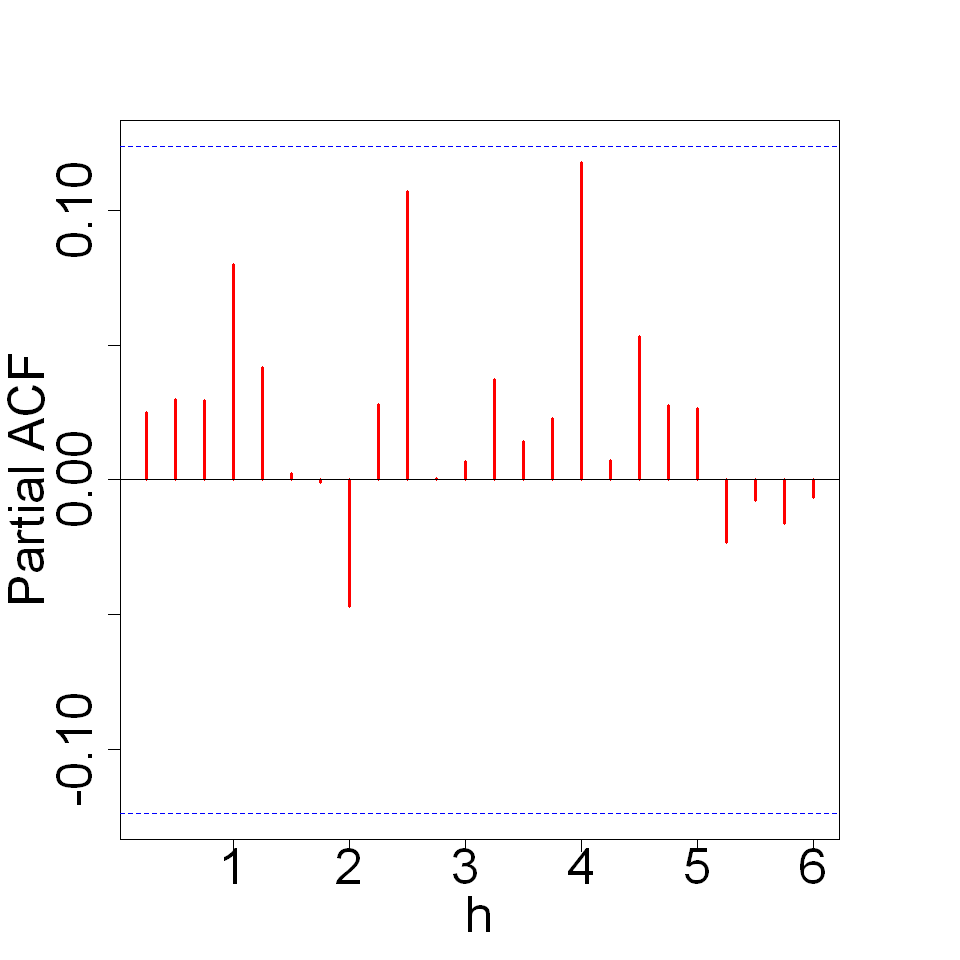

In [13]:
# Compute the partial autocorrelation function (PACF) of dy without plotting
pacfun = pacf(dy, plot = FALSE)

# Set the size of the plotting window (useful in Jupyter / R notebooks)
options(repr.plot.width = 8, repr.plot.height = 8)

# Adjust margins: bottom, left, top, right
par(mar = c(5, 5, 5, 5))

# Plot the PACF with custom styling
plot(pacfun,
     col = "red",        # bars in red
     main = "",          # remove the default main title
     cex = 2.5,          # scale size of points (not critical here)
     cex.lab = 2.5,      # enlarge axis labels (xlab, ylab)
     cex.axis = 2.5,     # enlarge tick labels
     xlab = "h",         # label for x-axis (lag h)
     lwd = 3)            # line width for bars


**Explanation**

The ACF does not provide a clear rule for detection of AR processes. The reason behind it is that indirect autocorrelations are present in ACF of any autoregressive
process: i.e. in an AR(1) there is a correlation between $y_t$ and $y_{t-2}$.

However, notice that the partial autocorrelation between $y_t$ and $y_{t-s}$ eliminates the
effects of the intervening values $y_{t-1}$ through $y_{t-s+1}$. Therefore in an
AR(1) process PAC of order 2 is zero.

As such, PACF provides a convenient rule for detection of a pure
AR process: its order is the largest k for which the partial
autocorrelation is different from zero.

For an invertible MA process, the PACF will measure the autocorrelations in the AR$(\infty)$ process that corresponds to that process. Hence the slow decay towards zero.

**Takeaway: ACF can help us detect the order of a MA process, the last significant lag of ACF function is the suggested lag of MA process.**

**Takeaway: PACF can help us detect the order of an AR process, the last significant lag of PACF function is the suggested lag of AR process.**

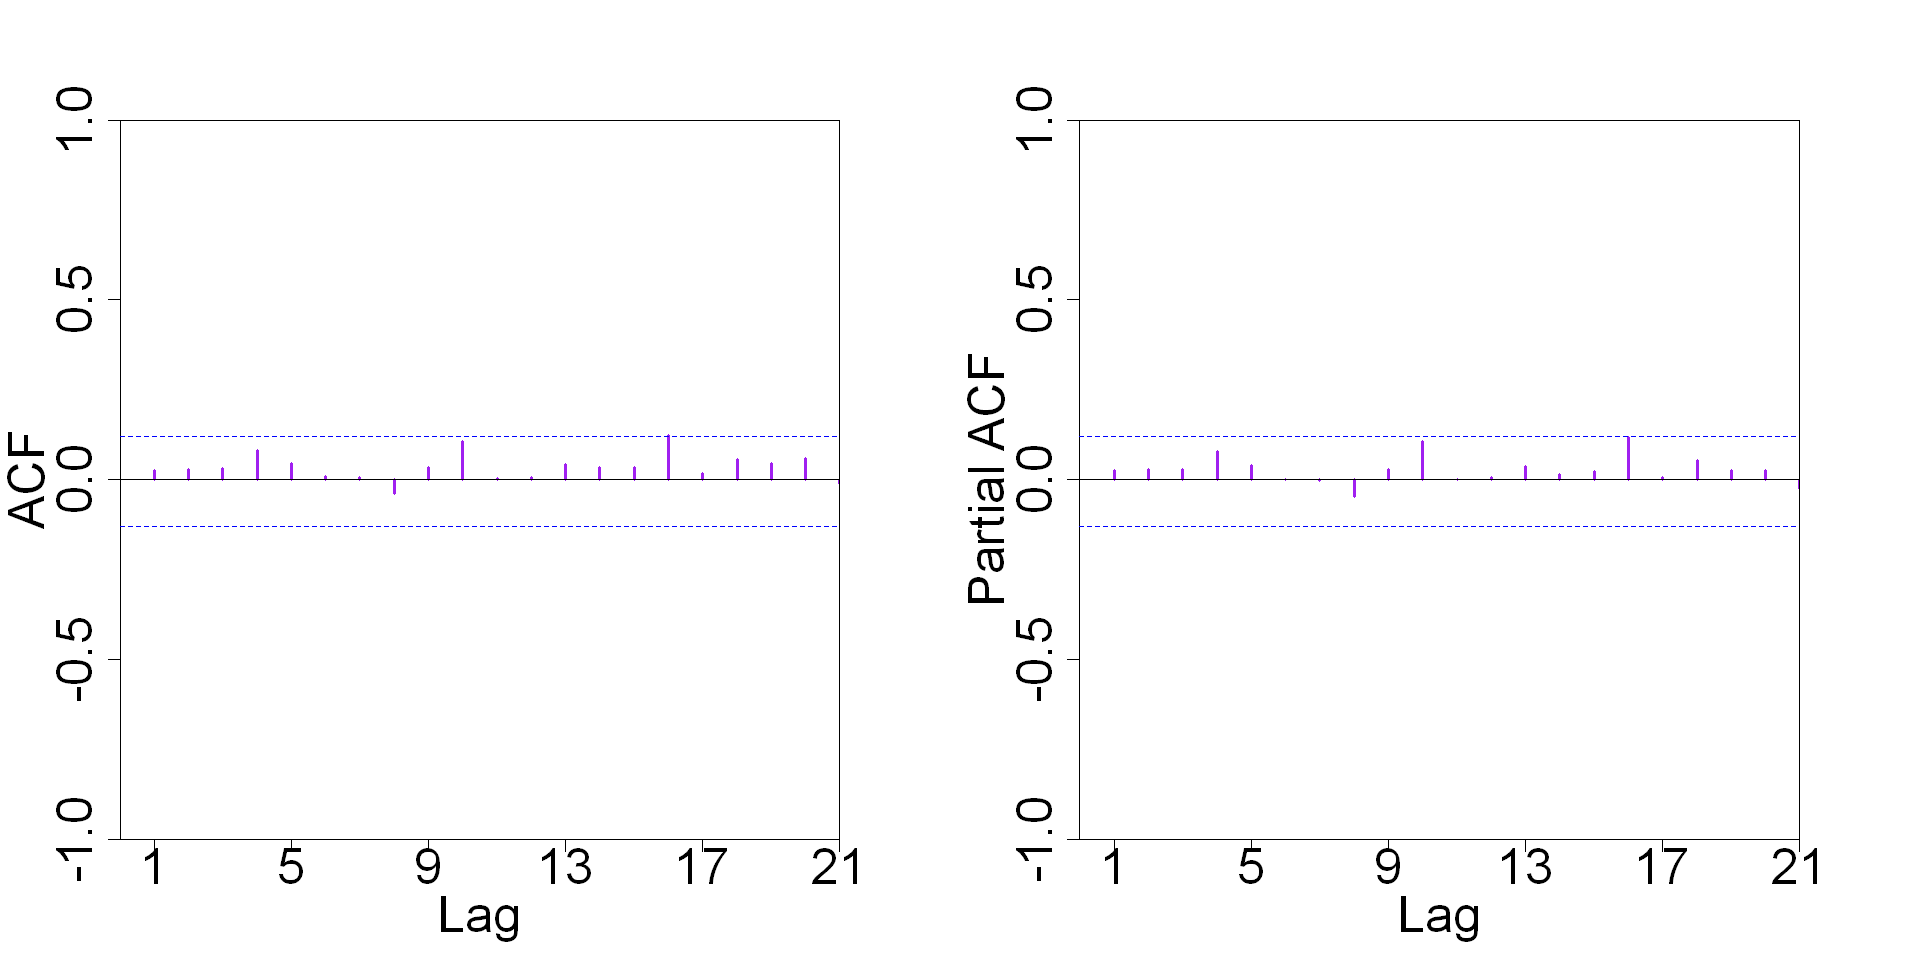

In [14]:
myplot.acf = function(ACFobj) {
    rr = ACFobj$acf[-1]
    kk = length(rr)
    nn = ACFobj$n.used
    plot(seq(kk), rr, type = "h", lwd = 3, yaxs = "i", xaxs = "i",
        ylim = c(floor(min(rr)), 1), xlim = c(0, 21), xlab = "Lag",
        ylab = "ACF", col="purple", main="", cex = 2.5,
         cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5, xaxp = c(1, 21, 5))
    abline(h = -1/nn + c(-2, 2)/sqrt(nn), lty = "dashed", col = "blue")
    abline(h = 0)
}

myplot.pacf = function(PACFobj) {
    rr = PACFobj$acf
    kk = length(rr)
    nn = PACFobj$n.used
    plot(seq(kk), rr, type = "h", lwd = 3, yaxs = "i", xaxs = "i",
        ylim = c(floor(min(rr)), 1), xlim = c(0, 21), xlab = "Lag",
        ylab = "Partial ACF", col="purple", main="", cex = 2.5,
         cex.lab=2.5, cex.axis=2.5, cex.main=2.5, cex.sub=2.5, xaxp = c(1, 21, 5))
    abline(h = -1/nn + c(-2, 2)/sqrt(nn), lty = "dashed", col = "blue")
    abline(h = 0)
}

options(repr.plot.width=16, repr.plot.height=8)
par(mar = c(5, 5, 5, 5), mfrow = c(1,2))
acf.y = acf(dy, plot = FALSE)
myplot.acf(acf.y)

pacf.y = pacf(dy, plot = FALSE)
myplot.pacf(pacf.y)

### Interpretation of ACF and PACF

Looking at your plots:

- **ACF (blue plot):** after lag 0, all spikes are very small and stay within the confidence bands (dashed lines).  
  This suggests no significant autocorrelation.  

- **PACF (red plot):** all spikes are also small, with only a few touching but not clearly exceeding the confidence bounds.  

**Together, this means:**

- There is no evidence of systematic dependence across lags.  
- The series `dy` looks like **white noise**: observations are uncorrelated over time.  
- In other words, the process does **not show memory** (no persistence or autoregressive structure).  


# Step 7: Estimate an AR(1) model

Consider the AR(1) model:
$$
\color{blue}{y_t = \alpha_0 + \alpha_1 y_{t-1} + e_t, 
\qquad e_t \sim \text{i.i.d.}(0,\sigma^2)}.
$$


#### 1) Expectation
$$
\boxed{\;E[y_t] = \dfrac{\alpha_0}{1-\alpha_1}}
$$

$\Rightarrow \alpha_1 \neq 1$.


#### 2) Variance
$$
\boxed{\mathrm{Var}(y_t) = \dfrac{\sigma^2}{1-\alpha_1^2}\;}
$$

$\Rightarrow |\alpha_1|<1$.

#### 3) Covariance
For lag $k\ge 1$:
$$
\boxed{\;\gamma_k = \alpha_1^{\,k}\,\dfrac{\sigma^2}{1-\alpha_1^2}}
$$

$\Rightarrow |\alpha_1|<1$.



**Stationarity condition:** $|\alpha_1|<1$ ensures constant mean and finite, time-invariant variance/covariance.


<img src="COLOURBOX49899644.jpg" width="200" style="float:left;">



<div style="background-color:lightgrey; padding:10px; border-radius:5px;">
<b>Proof:</b>
    
Consider
$$
y_t = \phi_0 + \phi_1 y_{t-1} + e_t, 
\qquad e_t \sim \text{i.i.d.}(0,\sigma^2).
$$


#### 1. Expectation
Take expectations:
$$
\mathbb{E}[y_t] = \phi_0 + \phi_1 \mathbb{E}[y_{t-1}] + \mathbb{E}[e_t].
$$
Since $\mathbb{E}[e_t]=0$ and under stationarity $\mathbb{E}[y_t]=\mathbb{E}[y_{t-1}]=\mu$:
$$
\mu = \phi_0 + \phi_1 \mu 
\;\;\Rightarrow\;\;
\mu(1-\phi_1) = \phi_0 
\;\;\Rightarrow\;\;
\mu = \frac{\phi_0}{1-\phi_1}, \quad \phi_1 \neq 1.
$$

#### 2. Variance
Take variances:
$$
\mathrm{Var}(y_t) = \mathrm{Var}(\phi_0 + \phi_1 y_{t-1} + e_t).
$$

Since $\phi_0$ is constant and drops out:
$$
\mathrm{Var}(y_t) = \mathrm{Var}(\phi_1 y_{t-1} + e_t).
$$

Because $e_t$ is independent of $y_{t-1}$:
$$
\mathrm{Var}(y_t) = \phi_1^2 \mathrm{Var}(y_{t-1}) + \mathrm{Var}(e_t).
$$

Under stationarity, $\mathrm{Var}(y_t)=\mathrm{Var}(y_{t-1})=\gamma_0$, so:
$$
\gamma_0 = \phi_1^2 \gamma_0 + \sigma^2
\;\;\Rightarrow\;\;
\gamma_0(1-\phi_1^2) = \sigma^2
\;\;\Rightarrow\;\;
\;\gamma_0 = \frac{\sigma^2}{1-\phi_1^2}, \quad |\phi_1|<1.
$$



#### 3. Covariance
For lag $k \ge 1$:
$$
\gamma_k = \mathrm{Cov}(y_t, y_{t-k}) 
= \mathrm{Cov}(\phi_1 y_{t-1} + e_t,\; y_{t-k}).
$$
Because $e_t$ is independent of past values,
$$
\gamma_k = \phi_1\,\mathrm{Cov}(y_{t-1}, y_{t-k})
= \phi_1 \gamma_{k-1}.
$$
By recursion,
$$
\gamma_k = \phi_1^k \gamma_0, \quad k \ge 0.
$$

Hence for $|\phi_1|<1$, the AR(1) process is weakly stationary with  
- mean $\mu = \phi_0/(1-\phi_1)$,  
- variance $\sigma^2/(1-\phi_1^2)$,  
- autocovariance $\gamma_k = \phi_1^k \gamma_0$.  

    </div>

<div style="background-color:lightgrey; padding:10px; border-radius:5px;">
<b>Proof:</b>
    
Consider
$$
y_t = \phi_0 + \phi_1 y_{t-1} + e_t, 
\qquad e_t \sim \text{i.i.d.}(0,\sigma^2).
$$


#### Rewrite:
1. 1st period

$$
y_1 = \alpha_0 + \alpha_1 y_0 + e_1
$$



 2. 2nd period

$$
y_2 = \alpha_0 + \alpha_1 y_1 + e_2
     = \alpha_0 + \alpha_1 (\alpha_0 + \alpha_1 y_0 + e_1) + e_2
$$

$$
y_2 = \alpha_0(1 + \alpha_1) + \alpha_1^2 y_0 + \alpha_1 e_1 + e_2
$$



3. 3rd period

$$
y_3 = \alpha_0 + \alpha_1 y_2 + e_3
$$

$$
= \alpha_0 + \alpha_1\big[\alpha_0(1 + \alpha_1) + \alpha_1^2 y_0 + \alpha_1 e_1 + e_2\big] + e_3
$$

$$
= \alpha_0(1 + \alpha_1 + \alpha_1^2) + \alpha_1^3 y_0 + \alpha_1^2 e_1 + \alpha_1 e_2 + e_3
$$

4 $n$th period. By induction, we obtain a genral form:

$$
y_t = \sum_{j=0}^{t-1} \alpha_0\alpha_1^{j} 
      + \alpha_1^t y_0
      + \sum_{j=0}^{t-1} \alpha_1^j e_{t-j}
$$

#### Expectation:
$$
\mathbb{E}[y_t] = \alpha_0 \sum_{j=0}^{t-1} \alpha_1^j + \alpha_1^t \mathbb{E}[y_0].
$$

If $|\alpha_1|<1$ and $t\to\infty$, then $\alpha_1^t \mathbb{E}[y_0]\to 0$ and the geometric sum converges:
$$
\lim_{t\to\infty} \mathbb{E}[y_t] = \frac{\alpha_0}{1-\alpha_1}.
$$


#### Variance:
$$
\mathrm{Var}(y_t) = \mathrm{Var}\left(\sum_{j=0}^{t-1}\alpha_1^j e_{t-j}\right).
$$

Since $e_t$ are i.i.d.,
$$
\mathrm{Var}(y_t) = \sigma^2 \sum_{j=0}^{t-1} (\alpha_1^j)^2.
$$

For $|\alpha_1|<1$ and $t\to\infty$,
$$
\lim_{t\to\infty}\mathrm{Var}(y_t) = \frac{\sigma^2}{1-\alpha_1^2}.
$$


#### Covariance:
For lag $k$,
$$
\mathrm{Cov}(y_t, y_{t-k}) = E\Bigg[\Big(\sum_{j=0}^{t-1}\alpha_1^j e_{t-j}\Big)\Big(\sum_{m=0}^{t-k-1}\alpha_1^m e_{t-k-m}\Big)\Bigg].
$$

Nonzero terms occur only when indices match, giving:
$$
\mathrm{Cov}(y_t,y_{t-k}) = \sigma^2 \alpha_1^k \sum_{r=0}^{t-k-1}\alpha_1^{2r}.
$$

As $t\to\infty$, this converges to:
$$
\mathrm{Cov}(y_t,y_{t-k}) = \alpha_1^k \frac{\sigma^2}{1-\alpha_1^2}.
$$


</div>

In [ ]:
library(stargazer)
model.ar1 = arima(dy, order = c(1,0,0)) # order is pure AR (1, 0, 0), pure MA (0, 0, 1), both (1, 0, 1)
stargazer(model.ar1, type = "text")


                      Dependent variable:    
                  ---------------------------
                              dy             
---------------------------------------------
ar1                          0.027           
                            (0.063)          
                                             
intercept                  0.007***          
                            (0.001)          
                                             
---------------------------------------------
Observations                  256            
Log Likelihood              758.550          
sigma2                      0.0002           
Akaike Inf. Crit.         -1,511.100         
Note:             *p<0.1; **p<0.05; ***p<0.01


#### 1. Estimation results
- **AR(1) coefficient**: $\hat \alpha_1 = 0.027$ (std. error = 0.063)  
  → Statistically insignificant → no meaningful persistence.  

- **Intercept (mean)**: $\hat \mu = 0.007$ (std. error = 0.001, ***p<0.01)  
In R’s `arima()` function, the reported **intercept** corresponds to the **unconditional mean**  
$$
\mu = E[y_t] = \frac{\alpha_0}{1-\alpha_1}.
$$
  → The expected value of $y_t$ is about **0.7% per period**.  

- **Residual variance**: $\hat \sigma^2 = 0.0002$  

- **Log likelihood**: 758.55  
- **AIC**: –1511.10  

#### 2. Expectation
In R’s parametrization:
$$
E[y_t] = \mu = 0.007.
$$



#### 3. Variance
For stationary AR(1):
$$
\mathrm{Var}(y_t) = \frac{\sigma^2}{1-\alpha_1^2}.
$$

Plugging in:
$$
\mathrm{Var}(y_t) = \frac{0.0002}{1-(0.027)^2} \approx 0.000200.
$$


#### 4. First-order autocorrelation
By definition:
$$
\rho_1 = \alpha_1 \approx 0.027.
$$

This is very small and statistically insignificant, so the process shows **almost no persistence**.

---

### Conclusion
- The intercept in R output represents the **mean** ($\mu \approx 0.007$).  
- The variance is $\approx 0.0002$.  
- The AR(1) coefficient is not significant, so the process is essentially **white noise with a positive mean of 0.7% per period**.


# Compare models using information criteria

Our goal is to select a **stationary** and **parsimonious** model that has
a good fit. In cross section econometrics the $R^2$ and the adj. $R^2$ are
usually used for comparing models in terms of fit. What does $R^2=0.49$ tells us? Can $R^2$ be used to assess fit of a time series model?

$$R^2=\frac{\text{Explained sum of squares}}{\text{Total sum of squares}}=\frac{\sum_{i=1}^n\left(\hat{y}_i-\bar{y}\right)^2}{\sum_{i=1}^n\left({y}_i-\bar{y}\right)^2} = \frac{SSE}{SST}=1-\frac{SSR}{SST}$$

Model selection criteria account for a trade-off between reducing residual sum of squares and
loosing degrees of freedom by penalizing the inclusion of an excessive number of lags.

Information criteria:
<ol>
<li> Akaike Information Criterion (AIC)
    $$ \text{AIC} = T\ln\left(SSR/T\right) + 2k$$
<li> Bayesian Information Criterion (BIC)    
    $$ \text{BIC} = T\ln\left(SSR/T\right) + \ln\left(T\right)k,$$
    where $k$ denotes the number of regressors (e.g. $p + q$)
</ol>    

There are several versions of such criteria, but all are functions of the
residual sum of squares of the model and the number of regressors.

To adequately compare the alternative models, $T$ should be kept fixed? _Can you see why?_

**Decision rule: choose the model with the lowest value of the criteria.**

Notes: Which criterion will provide you with a more parsimonious model?

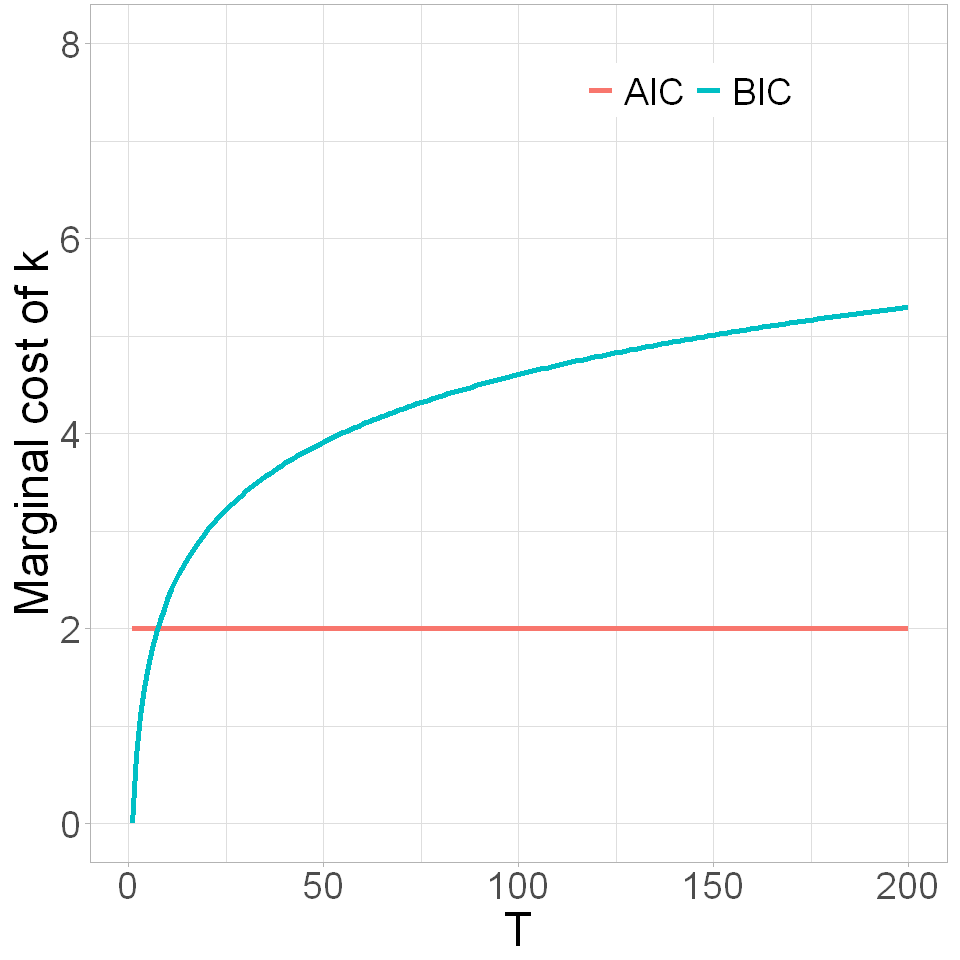

In [53]:
# Load the stargazer package, which produces nicely formatted model output
library(stargazer)

# Estimate an ARMA(0,0) model on the growth rate series 'dy'
# - order = c(0,0,0) specifies no MA, no differencing, no AR component
#   i.e. dy_t = intercept + error_t
model.arma00 = arima(dy, order = c(0,0,0))

# Print the ARMA(0,0) estimation results in plain text format
# stargazer provides a cleaner regression-like summary than the default arima() output
stargazer(model.arma00, type = "text")


                      Dependent variable:    
                  ---------------------------
                              dy             
---------------------------------------------
intercept                  0.007***          
                            (0.001)          
                                             
---------------------------------------------
Observations                  256            
Log Likelihood              758.456          
sigma2                      0.0002           
Akaike Inf. Crit.         -1,512.913         
Note:             *p<0.1; **p<0.05; ***p<0.01


In [46]:
# Load the stargazer package, which produces nicely formatted model output
library(stargazer)

# Estimate an MA(1) model on the growth rate series 'dy'
# - order = c(0,0,1) specifies MA(1), no differencing, no AR component
#   i.e. dy_t = intercept + alpha_1 * error_{t-1} + error_t
model.ma1 = arima(dy, order = c(0,0,1))

# Print the MA(1) estimation results in plain text format
# stargazer provides a cleaner regression-like summary than the default arima() output
stargazer(model.ma1, type = "text")


                      Dependent variable:    
                  ---------------------------
                              dy             
---------------------------------------------
ma1                          0.025           
                            (0.060)          
                                             
intercept                  0.007***          
                            (0.001)          
                                             
---------------------------------------------
Observations                  256            
Log Likelihood              758.543          
sigma2                      0.0002           
Akaike Inf. Crit.         -1,511.087         
Note:             *p<0.1; **p<0.05; ***p<0.01


In [45]:
# Load the stargazer package, which produces nicely formatted model output
library(stargazer)

# Estimate an ARMA(1,1) model on the growth rate series 'dy'
# - order = c(1,0,1) specifies AR(1) and MA(1), no differencing
#   i.e. dy_t = intercept + alpha_1 * dy_{t-1} + theta_1 * error_{t-1} + error_t
model.arma11 = arima(dy, order = c(1,0,1))

# Print the ARMA(1,1) estimation results in plain text format
# stargazer provides a cleaner regression-like summary than the default arima() output
stargazer(model.arma11, type = "text")


                      Dependent variable:    
                  ---------------------------
                              dy             
---------------------------------------------
ar1                        0.990***          
                            (0.015)          
                                             
ma1                        -0.964***         
                            (0.024)          
                                             
intercept                  0.008***          
                            (0.002)          
                                             
---------------------------------------------
Observations                  256            
Log Likelihood              760.936          
sigma2                      0.0002           
Akaike Inf. Crit.         -1,513.873         
Note:             *p<0.1; **p<0.05; ***p<0.01


In [54]:
# Collect AIC values into a data frame for comparison
# Note: lower AIC indicates better fit, but values are only strictly comparable 
# if the models are estimated on the same number of observations
AICdf = data.frame(
  ARMA00 = AIC(model.arma00),
  AR1   = AIC(model.ar1),
  MA1   = AIC(model.ma1),
  ARMA11 = AIC(model.arma11)
)

# Collect BIC values into a data frame for comparison
# Same caveat: direct comparison is not ideal when effective sample sizes differ
BICdf = data.frame(
  ARMA00 = BIC(model.arma00),
  AR1   = BIC(model.ar1),
  MA1   = BIC(model.ma1),
  ARMA11 = BIC(model.arma11)
)

# Display AIC and BIC tables
AICdf
BICdf

ARMA00,AR1,MA1,ARMA11
<dbl>,<dbl>,<dbl>,<dbl>
-1512.913,-1511.1,-1511.087,-1513.873


ARMA00,AR1,MA1,ARMA11
<dbl>,<dbl>,<dbl>,<dbl>
-1505.822,-1500.464,-1500.451,-1499.692


### Model Selection (AIC and BIC)

We compared ARMA models using AIC (first table) and BIC (second table):

- **ARMA(0,0):**  
  - AIC = -1512.913, BIC = -1505.822  
  - Baseline white noise model.  

- **AR(1):**  
  - AIC = -1511.100, BIC = -1500.464  
  - Worse fit than ARMA(0,0).  

- **MA(1):**  
  - AIC = -1511.087, BIC = -1500.451  
  - Worse fit than ARMA(0,0).  

- **ARMA(1,1):**  
  - AIC = -1513.873 (**lowest AIC**) → best by AIC.  
  - BIC = -1499.692 (**highest BIC**) → worst by BIC.  

**Conclusion:**

- **AIC** suggests **ARMA(1,1)** is the best-fitting model.  
- **BIC** suggests **ARMA(0,0)** (white noise) is the most appropriate.  

Since BIC penalizes complexity more strongly, and the ACF/PACF showed no memory,  
the evidence leans toward **white noise**: the series has no significant autoregressive or moving-average structure.


# Step 9: Export results

**R: Broom function**

In [56]:
library(broom)
write.csv(tidy(model.arma00), "output-arma00.csv")

**R: Stargazer function**

https://cran.r-project.org/web/packages/stargazer/vignettes/stargazer.pdf

In [57]:
library(stargazer)
stargazer(model.arma00, type = "text", out="output-arma00.doc")


                      Dependent variable:    
                  ---------------------------
                              dy             
---------------------------------------------
intercept                  0.007***          
                            (0.001)          
                                             
---------------------------------------------
Observations                  256            
Log Likelihood              758.456          
sigma2                      0.0002           
Akaike Inf. Crit.         -1,512.913         
Note:             *p<0.1; **p<0.05; ***p<0.01


<img src="COLOURBOX33413532.jpg" width="200">

# Exercise

Find the best ARMA model for Personal Consumption Expenditure.
https://fred.stlouisfed.org/series/PCE